Al finalizar este documento, se econtraran recomendaciones de nuevas caracteristicas posibles y justificacion de la eleccion de las mismas

Proceso ETL:

importacion de librerias:

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
import uuid

In [2]:
# lectura de archivo:
df = pd.read_csv(r'Data/challenge_edMachina.csv', sep=';')
df.head()

,particion,periodo,nota_final_materia,fecha_mesa_epoch,nombre_examen,nota_parcial,assignment_id,ass_name,ass_created_at,ass_due_at,...,sub_uuid,score,submission_type,s_submitted_at,s_graded_at,s_created_at,user_uuid,course_uuid,course_name,legajo
0,0,1-2022,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF
1,1,1-2022,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF
2,2,1-2022,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF
3,3,1-2022,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF
4,4,1-2022,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF


In [3]:
# cambiamos nombre de columnas para mejor lectura y comprension:

df.rename(columns= {'particion':'dias_cursado','periodo':'semestre_año','course_name':'nombre_curso','assignment_id': 'id_tarea', 'ass_name': 'nombre_de_la_tarea',
                    'ass_created_at':'fecha_creacion_tarea','course_uuid':'id_curso','user_uuid':'id_usuario',
                    'ass_due_at':'vencimiento_tarea', 'ass_unlock_at':'apertura_tarea','ass_lock_at':'cierre_tarea',
                    'points_possible':'puntos_posibles','ass_name_sub':'nombre_entrega','sub_uuid':'id_entrega_tarea',
                    'score':'puntaje', 'submission_type':'formato_entrega', 's_submitted_at':'fecha_entrega','s_graded_at':'fecha_correccion',
                    's_created_at':'fecha_creacion_tarea'}, inplace=True) 

In [4]:
# revision de nombres de columnas
df.columns

Index(['dias_cursado', 'semestre_año', 'nota_final_materia',
       'fecha_mesa_epoch', 'nombre_examen', 'nota_parcial', 'id_tarea',
       'nombre_de_la_tarea', 'fecha_creacion_tarea', 'vencimiento_tarea',
       'apertura_tarea', 'cierre_tarea', 'puntos_posibles', 'nombre_entrega',
       'id_entrega_tarea', 'puntaje', 'formato_entrega', 'fecha_entrega',
       'fecha_correccion', 'fecha_creacion_tarea', 'id_usuario', 'id_curso',
       'nombre_curso', 'legajo'],
      dtype='object')

In [5]:
# analisis primario de la informacion: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196124 entries, 0 to 196123
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   dias_cursado          196124 non-null  int64  
 1   semestre_año          196124 non-null  object 
 2   nota_final_materia    196124 non-null  float64
 3   fecha_mesa_epoch      7010 non-null    float64
 4   nombre_examen         7010 non-null    object 
 5   nota_parcial          7010 non-null    float64
 6   id_tarea              26061 non-null   float64
 7   nombre_de_la_tarea    26061 non-null   object 
 8   fecha_creacion_tarea  26061 non-null   float64
 9   vencimiento_tarea     26061 non-null   float64
 10  apertura_tarea        24760 non-null   float64
 11  cierre_tarea          25979 non-null   float64
 12  puntos_posibles       26061 non-null   float64
 13  nombre_entrega        24206 non-null   object 
 14  id_entrega_tarea      24206 non-null   object 
 15  

In [6]:
# visualizamos nulos por columna:
df.isnull().sum()

dias_cursado                 0
semestre_año                 0
nota_final_materia           0
fecha_mesa_epoch        189114
nombre_examen           189114
nota_parcial            189114
id_tarea                170063
nombre_de_la_tarea      170063
fecha_creacion_tarea    170063
vencimiento_tarea       170063
apertura_tarea          171364
cierre_tarea            170145
puntos_posibles         170063
nombre_entrega          171918
id_entrega_tarea        171918
puntaje                 172248
formato_entrega         171918
fecha_entrega           171918
fecha_correccion        172247
fecha_creacion_tarea    171918
id_usuario                   0
id_curso                     0
nombre_curso                 0
legajo                       0
dtype: int64

In [7]:
# filtramos y exportamos las filas que tienen todas las columnas completas para luego buscar alguna relacion en un analisis aparte
filas_completas = df.dropna()

#filas_completas.to_csv('solo_filas_completas.csv')

In [8]:
# ver si hay filas duplicadas en el df filtrado.
filas_completas[filas_completas.duplicated()]

,dias_cursado,semestre_año,nota_final_materia,fecha_mesa_epoch,nombre_examen,nota_parcial,id_tarea,nombre_de_la_tarea,fecha_creacion_tarea,vencimiento_tarea,...,id_entrega_tarea,puntaje,formato_entrega,fecha_entrega,fecha_correccion,fecha_creacion_tarea,id_usuario,id_curso,nombre_curso,legajo


eliminamos columnas en df que son redundantes; en su mayoria son datos vacios y no aportan al analisis ya que el dato se puede extraer de otra variable.


In [9]:
# columnas a eliminar: 
columns_to_drop = ['fecha_mesa_epoch', 'nombre_examen', 'nota_parcial', 'id_tarea',
                   'nombre_de_la_tarea', 'fecha_creacion_tarea', 'vencimiento_tarea',
                   'apertura_tarea', 'cierre_tarea', 'puntos_posibles', 'nombre_entrega',
                   'id_entrega_tarea', 'puntaje', 'formato_entrega', 'fecha_entrega', 
                   'fecha_correccion', 'fecha_creacion_tarea']

df.drop(columns=columns_to_drop, inplace=True)

In [10]:
df[df.duplicated()]

,dias_cursado,semestre_año,nota_final_materia,id_usuario,id_curso,nombre_curso,legajo
22,21,1-2022,9.0,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF
34,32,1-2022,9.0,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF
35,32,1-2022,9.0,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF
109,45,1-2022,5.0,8289fbcb-a999-4b5b-8d7e-a4ea0fe477d5,14d11dfe-01d7-4c8a-8489-59cce7e2d051,Switchable radical service-desk,730281VXM
120,55,1-2022,5.0,8289fbcb-a999-4b5b-8d7e-a4ea0fe477d5,14d11dfe-01d7-4c8a-8489-59cce7e2d051,Switchable radical service-desk,730281VXM
...,...,...,...,...,...,...,...
196059,59,1-2022,7.0,1f043fbc-2e51-4639-b99a-00e96f86968d,e14f5a9d-992e-4d5f-b9e2-a0c723b4219b,Cloned radical algorithm,398800TRX
196065,4,1-2022,10.0,1f043fbc-2e51-4639-b99a-00e96f86968d,d9cc0ef0-3282-4c10-b2c7-bc231a26ca6a,Customizable hybrid forecast,398800TRX
196066,4,1-2022,10.0,1f043fbc-2e51-4639-b99a-00e96f86968d,d9cc0ef0-3282-4c10-b2c7-bc231a26ca6a,Customizable hybrid forecast,398800TRX
196067,4,1-2022,10.0,1f043fbc-2e51-4639-b99a-00e96f86968d,d9cc0ef0-3282-4c10-b2c7-bc231a26ca6a,Customizable hybrid forecast,398800TRX


Hay algunos registros duplicados. Esto puede indicar que algunos estudiantes han cursado el mismo curso en el mismo semestre más de una vez, o distintas "actividades" registradas para el mismo periodo de tiempo como se indico en el enunciado del challenge. 

Proceso EDA:

In [11]:
# estadisticas descriptivas de las columnas numericas
df.describe()

,dias_cursado,nota_final_materia
count,196124.000000,196124.000000
mean,30.663891,7.546700
std,17.625074,1.732275
min,0.000000,0.000000
25%,15.000000,7.000000
50%,31.000000,8.000000
75%,46.000000,9.000000
max,59.000000,10.000000


In [12]:
# estadisticas descriptivas de las columnas categoricas
df.describe(include=['object'])

,semestre_año,id_usuario,id_curso,nombre_curso,legajo
count,196124,196124,196124,196124,196124
unique,3,600,582,561,601
top,1-2022,518e8c5f-6632-450b-bcee-518807ff2e9f,2b274b15-83bb-4629-941e-fdc573af4e0b,Intuitive non-volatile ability,624097JCN
freq,187854,1017,11439,11439,1017


* se observan inconsistencias en la columna 'semestre' dado que el año debe incluir unicamente 2 semestres y en este caso se encuentran como valores unicos 3. Se procede a estudiar los valores que contiene

* 'id_curso', que refiere al identificador unico de cada curso contiene 582 valores unicos aunque existen 561 nombres de cursos por lo cual se considera incosistente y se procede a estudiar.  

* la columna 'id_usuario' contiene 600 unicos registros aunque existen 601 'legajos', analizamos a continuacion.

In [13]:
df['semestre_año'].unique()

array(['1-2022', '01-2022', '2-2022'], dtype=object)

como se observa, existe el valor 01-2022 por lo que corregimos este con el indicado: 1-2022

In [14]:
df['semestre_año'] = df['semestre_año'].str.replace('01-', '1-')

In [15]:
df['semestre_año'].unique()

array(['1-2022', '2-2022'], dtype=object)

In [16]:
# buscamos cursos con multiples id
cursos_por_nombre = df.groupby('nombre_curso')['id_curso'].nunique()
cursos_multiple_id =  cursos_por_nombre[cursos_por_nombre > 1]

print('cursos con multiples id:' , cursos_multiple_id)

cursos con multiples id: nombre_curso
Cloned radical algorithm                             2
Customer-focused multi-state open architecture       2
Customer-focused optimizing attitude                 2
Down-sized 24hour migration                          2
Enhanced coherent conglomeration                     2
Ergonomic needs-based support                        2
Function-based systemic info-mediaries               2
Implemented methodical function                      2
Monitored fault-tolerant Graphical User Interface    5
Optimized object-oriented challenge                  2
Optional exuding alliance                            2
Phased composite orchestration                       2
Proactive fresh-thinking project                     2
Profound eco-centric installation                    3
Quality-focused leadingedge budgetary management     2
Quality-focused systemic software                    2
Stand-alone upward-trending secured line             2
Name: id_curso, dtype: int6

* se observa que, por ejemplo, el curso 'Monitored fault-tolerant Graphical User Interface' tiene 5 id diferentes por lo que se produce una inconsistencia entre los datos y los cursos ya que se toma tal curso como si fuera otro. Esto quiere decir que existen al menos 5 usuarios que cursaron el mismo curso con id diferente. Para resolver la inconsistencia en este caso, tomamos el id_curso que mas se repite y lo asignamos a todos los usuarios. 

* Por otro lado, para el caso del curso 'Profound eco-centric installation' el cual cuenta con 3 id_curso, y cada usuario tiene un id_curso diferente, se toma un id_aleatorio y se normalizan todos

* Finalmente para los demas casos, que tienen doble id_curso. se aplicara la misma logica

Analizamos los id_curso diferentes en cada curso:

In [17]:
# filtra el df para obtener los id_curso asociados al curso especifico
id_cursos = df.loc[df['nombre_curso'] == 'Monitored fault-tolerant Graphical User Interface', 'id_curso']

# contar la frecuencia de cada id_curso dentro del subconjunto
frecuencias = id_cursos.value_counts()

# resutlados de los id_curso y sus frecuencias
print("id_curso asociados al curso 'Monitored fault-tolerant Graphical User Interface' y sus frecuencias son:")
print(frecuencias)


id_curso asociados al curso 'Monitored fault-tolerant Graphical User Interface' y sus frecuencias son:
id_curso
e2bf69a2-b722-427e-9dab-b03fd2c42e58    300
d0e5e02d-0b17-46f5-9693-2040a606b858     60
52fb613c-3227-41da-b2ca-9533318477a0     60
5d589b98-5da6-46bf-b43d-a6f174834c51     60
2a2a2207-20fc-46a8-aaf2-2d5af284ad38     60
Name: count, dtype: int64


In [18]:
id_cursos_buscar = ['e2bf69a2-b722-427e-9dab-b03fd2c42e58', 'd0e5e02d-0b17-46f5-9693-2040a606b858', 
                    '52fb613c-3227-41da-b2ca-9533318477a0', '5d589b98-5da6-46bf-b43d-a6f174834c51', 
                    '2a2a2207-20fc-46a8-aaf2-2d5af284ad38']

usuarios_asociados = df.loc[df['id_curso'].isin(id_cursos_buscar), 'id_usuario'].unique()

print("Los usuarios asociados a los id_curso especificos son:")
print(usuarios_asociados)

Los usuarios asociados a los id_curso especificos son:
['a6d88a6b-6301-4b52-8b78-e7c442502024'
 'c6075a5e-f132-409b-aaa8-294554583993'
 'ad5e973a-37dd-484e-a2a2-7eb1ddaa1947'
 '4d143e9d-a816-4c3e-9483-e3db2101a28c'
 '225053d1-37ab-466a-ba1b-93be86bca0f1'
 'e348fb5f-859c-4170-ac43-0ca703a6ca1e'
 'd70f5281-898b-4a1d-a46a-c23d45104b91'
 'ca3e0d24-4417-431d-afae-3ad3f33f3526'
 'ed4e3e5e-5c10-4187-91f7-82114442b119']


actualizamos los id_curso del curso 'Monitored fault-tolerant Graphical User Interface' con el id_curso mas frecuente e2bf69a2-b722-427e-9dab-b03fd2c42e58 para que se unifique y poder analizar posteriormente

In [19]:
# identifico los indices donde nombre_curso es 'Monitored fault-tolerant Graphical User Interface'
indices = df[df['nombre_curso'] == 'Monitored fault-tolerant Graphical User Interface'].index
# actualizar todos los id_curso para esos indices tomando en cuenta el id_curso mas frecuente 
df.loc[indices, 'id_curso'] = 'e2bf69a2-b722-427e-9dab-b03fd2c42e58'

In [20]:
df.loc[indices, ['id_curso', 'nombre_curso']]

,id_curso,nombre_curso
6452,e2bf69a2-b722-427e-9dab-b03fd2c42e58,Monitored fault-tolerant Graphical User Interface
6453,e2bf69a2-b722-427e-9dab-b03fd2c42e58,Monitored fault-tolerant Graphical User Interface
6454,e2bf69a2-b722-427e-9dab-b03fd2c42e58,Monitored fault-tolerant Graphical User Interface
6455,e2bf69a2-b722-427e-9dab-b03fd2c42e58,Monitored fault-tolerant Graphical User Interface
6456,e2bf69a2-b722-427e-9dab-b03fd2c42e58,Monitored fault-tolerant Graphical User Interface
...,...,...
185500,e2bf69a2-b722-427e-9dab-b03fd2c42e58,Monitored fault-tolerant Graphical User Interface
185501,e2bf69a2-b722-427e-9dab-b03fd2c42e58,Monitored fault-tolerant Graphical User Interface
185502,e2bf69a2-b722-427e-9dab-b03fd2c42e58,Monitored fault-tolerant Graphical User Interface
185503,e2bf69a2-b722-427e-9dab-b03fd2c42e58,Monitored fault-tolerant Graphical User Interface


In [21]:
# filtra el df para obtener los id_curso asociados al curso especifico
id_cursos_2 = df.loc[df['nombre_curso'] == 'Profound eco-centric installation', 'id_curso']

# contar la frecuencia de cada id_curso dentro del subconjunto
frecuencias2 = id_cursos_2.value_counts()

# resutlados de los id_curso y sus frecuencias
print("id_curso asociados al curso 'Profound eco-centric installation' y sus frecuencias son:")
print(frecuencias2)


id_curso asociados al curso 'Profound eco-centric installation' y sus frecuencias son:
id_curso
f4fa5a74-3c94-4030-8ccd-3dfca0799c3a    60
b0bd5452-3733-49cc-9fc1-959aedc10cc2    60
5513d795-2162-4e22-9c1a-cd62844bb65f    60
Name: count, dtype: int64


In [22]:
# identifico los indices donde nombre_curso es 'Profound eco-centric installation'
indices2 = df[df['nombre_curso'] == 'Profound eco-centric installation'].index
# actualizar todos los id_curso para esos indices
df.loc[indices2, 'id_curso'] = 'f4fa5a74-3c94-4030-8ccd-3dfca0799c3a'

df.loc[indices2, ['id_curso', 'nombre_curso']]

,id_curso,nombre_curso
6392,f4fa5a74-3c94-4030-8ccd-3dfca0799c3a,Profound eco-centric installation
6393,f4fa5a74-3c94-4030-8ccd-3dfca0799c3a,Profound eco-centric installation
6394,f4fa5a74-3c94-4030-8ccd-3dfca0799c3a,Profound eco-centric installation
6395,f4fa5a74-3c94-4030-8ccd-3dfca0799c3a,Profound eco-centric installation
6396,f4fa5a74-3c94-4030-8ccd-3dfca0799c3a,Profound eco-centric installation
...,...,...
183043,f4fa5a74-3c94-4030-8ccd-3dfca0799c3a,Profound eco-centric installation
183044,f4fa5a74-3c94-4030-8ccd-3dfca0799c3a,Profound eco-centric installation
183045,f4fa5a74-3c94-4030-8ccd-3dfca0799c3a,Profound eco-centric installation
183046,f4fa5a74-3c94-4030-8ccd-3dfca0799c3a,Profound eco-centric installation


In [23]:
# buscamos cursos con multiples id
cursos_por_nombre = df.groupby('nombre_curso')['id_curso'].nunique()
cursos_multiple_id =  cursos_por_nombre[cursos_por_nombre > 1].index.tolist()

for curso in cursos_multiple_id:
    id_curso_unico = df.loc[df['nombre_curso'] == curso, 'id_curso'].iloc[0]
    df.loc[df['nombre_curso'] == curso, 'id_curso'] = id_curso_unico


In [24]:
# corroboramos
cursos_por_nombre = df.groupby('nombre_curso')['id_curso'].nunique()
cursos_multiple_id =  cursos_por_nombre[cursos_por_nombre > 1]

print('cursos con multiples id:' , cursos_multiple_id)

cursos con multiples id: Series([], Name: id_curso, dtype: int64)


In [25]:
# buscamos id_usuario con multiples legajos
usuario_por_legajo = df.groupby('id_usuario')['legajo'].nunique()
usuario_multiple_id = usuario_por_legajo[usuario_por_legajo > 1]

print ('id con multiple legajo:', usuario_multiple_id)

id con multiple legajo: id_usuario
9d0a3bf7-7efc-405f-bd96-60d75f6033b4    2
Name: legajo, dtype: int64


In [26]:
# filtrar el df para el id_usuario específico
usuario_con_multiples_legajos = df[df['id_usuario'] == '9d0a3bf7-7efc-405f-bd96-60d75f6033b4']

# Ver los legajos asociados con este id_usuario
legajos_asociados = usuario_con_multiples_legajos['legajo'].unique()

print(f"El id_usuario '9d0a3bf7-7efc-405f-bd96-60d75f6033b4' tiene los siguientes legajos:")
print(legajos_asociados)


El id_usuario '9d0a3bf7-7efc-405f-bd96-60d75f6033b4' tiene los siguientes legajos:
['078920YCB' '772439OKZ']


en este caso se observa que dos alumnos poseen el mismo id_usuario por lo que es inconsistente. Procedemos a generar otro id_usuario para uno de los legajos 

In [27]:
# generar un nuevo id_usuario
nuevo_id_usuario = str(uuid.uuid4())
#cambiar id_usuario al legajo 772439OKZ
df.loc[(df['id_usuario'] == '9d0a3bf7-7efc-405f-bd96-60d75f6033b4') & (df['legajo'] == '772439OKZ'), 'id_usuario'] = nuevo_id_usuario

In [28]:
# corroboramos estadisticas descriptivas
df.describe(include=['object'])

,semestre_año,id_usuario,id_curso,nombre_curso,legajo
count,196124,196124,196124,196124,196124
unique,2,601,561,561,601
top,1-2022,518e8c5f-6632-450b-bcee-518807ff2e9f,2b274b15-83bb-4629-941e-fdc573af4e0b,Intuitive non-volatile ability,624097JCN
freq,195584,1017,11439,11439,1017


Distribucion de variables: 

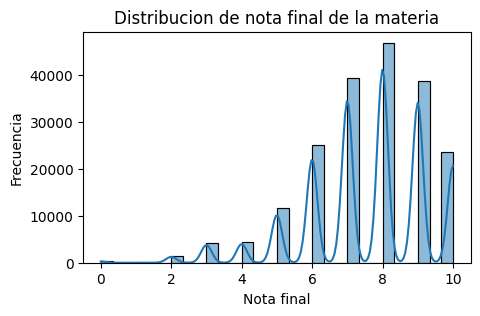

In [29]:
# visualizar la distribucion de la nota_final_materia
plt.figure(figsize=(5, 3))
sns.histplot(df['nota_final_materia'], bins=30, kde=True)
plt.title('Distribucion de nota final de la materia')
plt.xlabel('Nota final')
plt.ylabel('Frecuencia')
plt.show()

In [30]:
# cantidad de cursos que hizo cada alumno por semestre: 

cursos_por_alumno = df.groupby(['id_usuario', 'semestre_año'])['id_curso'].nunique().reset_index()
cursos_por_alumno.columns = ['id_usuario','semestre_año','cant_cursos']
cursos_por_alumno

,id_usuario,semestre_año,cant_cursos
0,01103370-3046-4bc0-a8f8-85858ec0ec88,1-2022,6
1,01193bc4-6b73-4fab-9a63-e425a2e397dd,1-2022,7
2,0230ccf5-89ea-4676-b05e-c3403c7b6fd3,1-2022,6
3,02323a7a-120c-485d-99b1-6247a57c46e4,1-2022,4
4,02927207-85cf-4640-8388-e4b0352703f7,1-2022,4
...,...,...,...
605,fcdd623b-d8e1-4fe4-9fd0-e249ff021411,1-2022,2
606,fd3c4db8-cdfe-45e6-84c5-11e4ef5f3926,1-2022,10
607,fe50e90a-b0af-4d82-b982-5a7790c3c72e,1-2022,6
608,fe7a316e-103e-4e94-a899-6bbc5ef55fd5,1-2022,4


In [31]:
# analisis por curso: Promedio de notas finales por curso
promedio_notas_por_curso = df.groupby('nombre_curso')['nota_final_materia'].mean().sort_values(ascending=False)
promedio_notas_por_curso

nombre_curso
Open-architected web-enabled parallelism    10.0
Customizable modular protocol               10.0
Organic eco-centric throughput              10.0
Automated radical alliance                  10.0
Triple-buffered holistic portal             10.0
                                            ... 
Ergonomic context-sensitive approach         3.0
Customizable value-added contingency         3.0
Synergistic dynamic capability               3.0
Proactive foreground firmware                2.0
Optional solution-oriented support           2.0
Name: nota_final_materia, Length: 561, dtype: float64

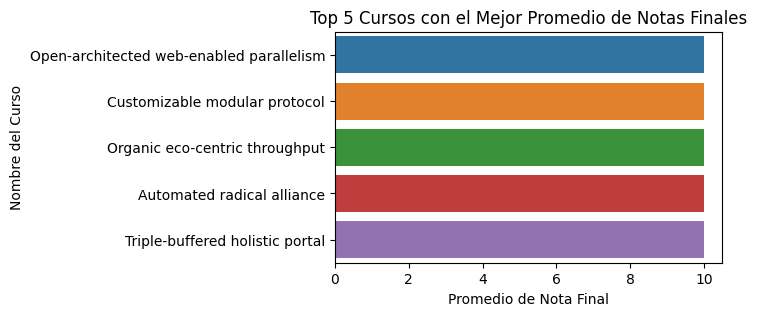

In [32]:
# Seleccionar los top 5 cursos con el mejor promedio de notas finales
top_5_cursos = promedio_notas_por_curso.head(5)

# Definir una paleta de colores personalizada (evitando verdes y rojos)
custom_colors = ['#1f77b4', '#ff7f0e', '#9467bd', '#8c564b', '#e377c2']

# Crear el gráfico de barras
plt.figure(figsize=(5, 3))
sns.barplot(x=top_5_cursos.values, y=top_5_cursos.index, hue=custom_colors, legend = False)

# Configurar el título y los ejes
plt.title('Top 5 Cursos con el Mejor Promedio de Notas Finales')
plt.xlabel('Promedio de Nota Final')
plt.ylabel('Nombre del Curso')
plt.show()

In [33]:
# analisis por semestre: Promedio de notas finales por semestre
df['semestre'] = pd.to_datetime(df['semestre_año'], format='%m-%Y').dt.strftime('%m-%Y')
promedio_notas_por_semestre = df.groupby('semestre')['nota_final_materia'].mean()
print(promedio_notas_por_semestre)

semestre
01-2022    7.544221
02-2022    8.444444
Name: nota_final_materia, dtype: float64


In [34]:
# Contar la cantidad de datos por semestre
conteo_por_semestre = df['semestre_año'].value_counts().reset_index()
conteo_por_semestre.columns = ['semestre_año', 'cantidad']

print(conteo_por_semestre)

  semestre_año  cantidad
0       1-2022    195584
1       2-2022       540


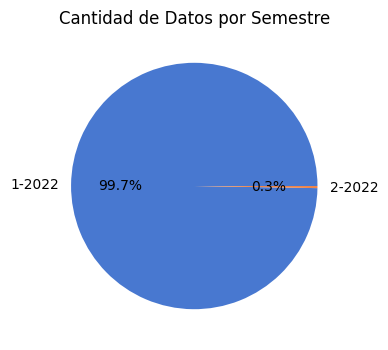

In [35]:
# columna 'semestre_año' esté en formato de string
df['semestre_año'] = df['semestre_año'].astype(str)

#  Contar la cantidad de registros por semestre
semestre_counts = df['semestre_año'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(4, 4))
plt.pie(semestre_counts, labels=semestre_counts.index, autopct='%1.1f%%', colors=sns.color_palette("muted"))

# Configurar el título
plt.title('Cantidad de Datos por Semestre')

# Mostrar el gráfico
plt.show()

In [36]:
# analisis cantidad de veces que aparece un curso 
df['nombre_curso'].value_counts()

nombre_curso
Intuitive non-volatile ability                11439
Object-based leadingedge help-desk            10341
Face-to-face regional concept                  4555
Stand-alone upward-trending secured line       4262
Total radical adapter                          3537
                                              ...  
Monitored regional artificial intelligence       60
Grass-roots national middleware                  60
Multi-channeled homogeneous policy               60
Operative fresh-thinking knowledge user          60
Operative systematic help-desk                   60
Name: count, Length: 561, dtype: int64

In [37]:
# Calcular el IQR para dias_cursado y nota_final_materia
Q1_dias_cursado = df['dias_cursado'].quantile(0.25)
Q3_dias_cursado = df['dias_cursado'].quantile(0.75)
IQR_dias_cursado = Q3_dias_cursado - Q1_dias_cursado

Q1_nota_final_materia = df['nota_final_materia'].quantile(0.25)
Q3_nota_final_materia = df['nota_final_materia'].quantile(0.75)
IQR_nota_final_materia = Q3_nota_final_materia - Q1_nota_final_materia

# Definir límites para outliers
lower_bound_dias_cursado = Q1_dias_cursado - 1.5 * IQR_dias_cursado
upper_bound_dias_cursado = Q3_dias_cursado + 1.5 * IQR_dias_cursado

lower_bound_nota_final_materia = Q1_nota_final_materia - 1.5 * IQR_nota_final_materia
upper_bound_nota_final_materia = Q3_nota_final_materia + 1.5 * IQR_nota_final_materia

# Filtrar outliers
outliers_dias_cursado = df[(df['dias_cursado'] < lower_bound_dias_cursado) | (df['dias_cursado'] > upper_bound_dias_cursado)]
outliers_nota_final_materia = df[(df['nota_final_materia'] < lower_bound_nota_final_materia) | (df['nota_final_materia'] > upper_bound_nota_final_materia)]

print("Outliers en dias_cursado:")
print(outliers_dias_cursado)

print("\nOutliers en nota_final_materia:")
print(outliers_nota_final_materia)

Outliers en dias_cursado:
Empty DataFrame
Columns: [dias_cursado, semestre_año, nota_final_materia, id_usuario, id_curso, nombre_curso, legajo, semestre]
Index: []

Outliers en nota_final_materia:
        dias_cursado semestre_año  nota_final_materia  \
1540               0       1-2022                 3.0   
1541               1       1-2022                 3.0   
1542               2       1-2022                 3.0   
1543               3       1-2022                 3.0   
1544               4       1-2022                 3.0   
...              ...          ...                 ...   
194824            57       1-2022                 3.0   
194825            57       1-2022                 3.0   
194826            57       1-2022                 3.0   
194827            58       1-2022                 3.0   
194828            59       1-2022                 3.0   

                                  id_usuario  \
1540    840e22cf-44b4-4637-86d2-a2ca7c06e632   
1541    840e22cf-44b4-

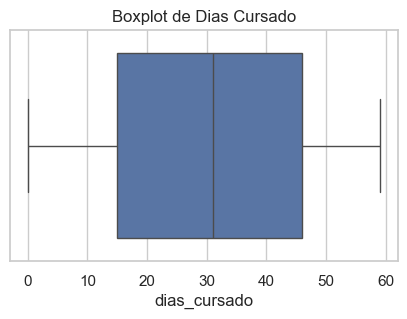

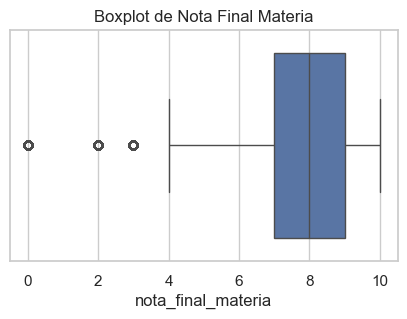

In [38]:
# estilo de los graficos
sns.set_theme(style="whitegrid")

# boxplot para 'dias_cursado'
plt.figure(figsize=(5, 3))
sns.boxplot(x='dias_cursado', data=df)
plt.title('Boxplot de Dias Cursado')
plt.show()

# boxplot para 'nota_final_materia'
plt.figure(figsize=(5, 3))
sns.boxplot(x='nota_final_materia', data=df)
plt.title('Boxplot de Nota Final Materia')
plt.show()

In [39]:
# Filtrar el df para encontrar las filas donde la nota final es 0,2,3
estudiantes_nota_0 = df[df['nota_final_materia'] == 0]
estudiantes_nota_2 = df[df['nota_final_materia'] == 2]
estudiantes_nota_3 = df[df['nota_final_materia'] == 3]

# Contar la cantidad de estudiantes con nota 0,2,3
cantidad_estudiantes_nota_0 = estudiantes_nota_0.shape[0]
cantidad_estudiantes_nota_2 = estudiantes_nota_2.shape[0]
cantidad_estudiantes_nota_3 = estudiantes_nota_3.shape[0]
print(f'Cantidad de estudiantes con nota 0: {cantidad_estudiantes_nota_0}')
print(f'Cantidad de estudiantes con nota 2: {cantidad_estudiantes_nota_2}')
print(f'Cantidad de estudiantes con nota 3: {cantidad_estudiantes_nota_3}')

Cantidad de estudiantes con nota 0: 318
Cantidad de estudiantes con nota 2: 1418
Cantidad de estudiantes con nota 3: 4301


In [40]:
# cinco cursos con las notas promedio mas bajas
peores_cursos = df[(df['nota_final_materia'] >= 0) & (df['nota_final_materia'] <= 3)]
peores_cursos


,dias_cursado,semestre_año,nota_final_materia,id_usuario,id_curso,nombre_curso,legajo,semestre
1540,0,1-2022,3.0,840e22cf-44b4-4637-86d2-a2ca7c06e632,70702c6e-4a91-47f8-85b9-9ed7c888fe87,Multi-channeled user-facing architecture,101513UNA,01-2022
1541,1,1-2022,3.0,840e22cf-44b4-4637-86d2-a2ca7c06e632,70702c6e-4a91-47f8-85b9-9ed7c888fe87,Multi-channeled user-facing architecture,101513UNA,01-2022
1542,2,1-2022,3.0,840e22cf-44b4-4637-86d2-a2ca7c06e632,70702c6e-4a91-47f8-85b9-9ed7c888fe87,Multi-channeled user-facing architecture,101513UNA,01-2022
1543,3,1-2022,3.0,840e22cf-44b4-4637-86d2-a2ca7c06e632,70702c6e-4a91-47f8-85b9-9ed7c888fe87,Multi-channeled user-facing architecture,101513UNA,01-2022
1544,4,1-2022,3.0,840e22cf-44b4-4637-86d2-a2ca7c06e632,70702c6e-4a91-47f8-85b9-9ed7c888fe87,Multi-channeled user-facing architecture,101513UNA,01-2022
...,...,...,...,...,...,...,...,...
194824,57,1-2022,3.0,51915d87-02a5-42fc-a2bd-207962e02963,c78af3b4-4574-4a82-8c41-45195ce43384,Object-based leadingedge help-desk,313925KII,01-2022
194825,57,1-2022,3.0,51915d87-02a5-42fc-a2bd-207962e02963,c78af3b4-4574-4a82-8c41-45195ce43384,Object-based leadingedge help-desk,313925KII,01-2022
194826,57,1-2022,3.0,51915d87-02a5-42fc-a2bd-207962e02963,c78af3b4-4574-4a82-8c41-45195ce43384,Object-based leadingedge help-desk,313925KII,01-2022
194827,58,1-2022,3.0,51915d87-02a5-42fc-a2bd-207962e02963,c78af3b4-4574-4a82-8c41-45195ce43384,Object-based leadingedge help-desk,313925KII,01-2022


Top cinco peores cursos:

In [41]:
promedio_notas_curso = peores_cursos.groupby('nombre_curso')['nota_final_materia'].mean().reset_index()

# Ordenar los cursos por la nota promedio de manera ascendente
promedio_notas_curso_ordenado = promedio_notas_curso.sort_values(by='nota_final_materia', ascending=True)

# Seleccionar los primeros 5 cursos con las peores notas promedio
top_5_peores_cursos = promedio_notas_curso_ordenado.head(5)

top_5_peores_cursos

,nombre_curso,nota_final_materia
28,Multi-channeled radical moratorium,0.000000
40,Proactive tangible paradigm,0.000000
11,Digitized actuating moderator,0.000000
17,Face-to-face incremental instruction set,1.994505
0,Adaptive heuristic framework,2.000000


In [42]:
# Contar registros por curso
registros_por_curso = df.groupby('nombre_curso').size()

# Encontrar maximo y minimo de registros por curso
maximo_registros = registros_por_curso.max()
minimo_registros = registros_por_curso.min()

print('maximo', maximo_registros)
print('minimo', minimo_registros)

maximo 11439
minimo 60


prueba estadistica ANOVA para comparar las medias de notas finales entre cursos

se decide estudiar aquellos cursos con mas de 200 registros existentes para tomar aquellos mas cursados, teniendo en cuenta que el minimo son 60 registros por curso.

In [43]:
# filtro los datos para eliminar cursos con pocos registros (>200)
cursos_frecuentes = df['nombre_curso'].value_counts().index[df['nombre_curso'].value_counts() > 200]
df_filtrado = df[df['nombre_curso'].isin(cursos_frecuentes)]

# Hipótesis Nula (H0):  establece que no hay diferencias significativas entre las medias de las notas finales de los diferentes cursos.

# Con un valor p bajo, generalmente se rechaza la hipótesis nula (H0).  significa que hay evidencia estadística 
# significativa para afirmar que al menos uno de los cursos tiene una media de notas finales significativamente diferente de los otros cursos.

# test ANOVA
resultado_anova = stats.f_oneway(*[df_filtrado[df_filtrado['nombre_curso'] == curso]['nota_final_materia'] # * es una forma de desempaquetar la lista de muestras en argumentos individuales. Es necesario para que stats.f_oneway() pueda interpretar correctamente cada muestra como un argumento separado.
                                for curso in cursos_frecuentes]) 

print("Resultado del ANOVA:")
print(f"F-value: {resultado_anova.statistic}")
print(f"p-value: {resultado_anova.pvalue}")

Resultado del ANOVA:
F-value: 190.46757564464602
p-value: 0.0


In [44]:
# test ANOVA df completo
resultado_anova = stats.f_oneway(*[df[df['nombre_curso'] == curso]['nota_final_materia'] for curso in df['nombre_curso'].unique()])

# Mostrar el resultado
print("Resultado del ANOVA  todo el dataframe:")
print(f"F-value: {resultado_anova.statistic}")
print(f"p-value: {resultado_anova.pvalue}")

Resultado del ANOVA  todo el dataframe:
F-value: 130.12513452299478
p-value: 0.0


Segun los resultados arrojados por la prueba ANOVA, tanto para los cursos con mayor cantidad de registros, como para el total, se observa un pvaleu de 0.0 y un fvalue grande en ambas pruebas; lo que indica que se rechaza la H0 y se concluye que existen diferencias significativas entre las medias, esto quiere decir que el curso en el que un estudiante se encuentra matriculado tiene un impacto significativo en su rendimiento academico segun lo medido por las notas finales. 

---

Luego del analisis de los datos y la limpieza de los mismos, con una importante eliminacion de valores nulos, se sugiere en este caso crear en un futuro una variable (o caracteristica) nueva como la 'edad', a partir del legajo del estudiante para luego poder analizar si este factor influye o no dentro de las notas finales de cada materia y la participacion en determinados cursos que eligen. 

Considerando que no se conoce con certeza si el legajo es como en Argentina, un identificador unico de cada persona, no se analiza la edad posible del alumno ni tampoco se desarrolla un modelo predictivo a partir de ella

In [46]:
df.to_csv('data_clean.csv')